In [ ]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import torch_converter as tc
import instance_generator as ig
import pickle

%load_ext autoreload
%autoreload 2

In [ ]:
G = ox.graph_from_place("Piedmont, California, USA", network_type="drive")
# G = ox.graph_from_place("Founex, Switzerland", network_type="drive")
#G = ox.graph_from_place("San Francisco, California, USA", network_type="drive")
G = ox.speed.add_edge_speeds(G)
G = ox.speed.add_edge_travel_times(G)
fig, ax = ox.plot_graph(G)
fig.savefig("data/founex")

In [ ]:
places = [
    "Piedmont, California, USA",
    "Founex, Switzerland",
    "Carmel, Indiana, USA",
    "Geneva, Switzerland"
]

for place in places:
    G = ox.graph_from_place(place, network_type="drive")
    G = ox.speed.add_edge_speeds(G)
    G = ox.speed.add_edge_travel_times(G)
    print(f"Now considering: {place}")
    fig, ax = ox.plot_graph(G)
    plt.show()

    path_lengths = dict(
        nx.all_pairs_dijkstra_path_length(G, weight='travel_time')
    )
    with open(f"data/OSMNX_{place}_travel_times.pickle", "wb") as handle:
        pickle.dump(path_lengths, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:

G = ox.graph_from_place("Piedmont, California, USA", network_type="drive")
print(53117098 in G.nodes())

In [ ]:
with open("data/OSMNX_Piedmont, California, USA_travel_times.pickle", "rb") as handle:
    travel_times = pickle.load(handle)

In [ ]:
travel_times[53035698]

In [ ]:
import pickle
def get_location_info(city):
	intersections = ox.graph_from_place(city, network_type="drive").nodes
	with open(f"data/OSMNX_{city}_travel_times.pickle", "rb") as handle:
		drive_times = pickle.load(handle)

	return {
		'intersections': intersections, 
		'drive_times': drive_times,
		'city': city
	}
piedmont = get_location_info("Piedmont, California, USA")


In [ ]:
%%time
from instance_generator import _sample_bipartite_graph
seed = np.random.randint(0, 500000)
rng = np.random.default_rng(seed)# get the nearest network nodes to two lat/lng points with the distance module
kwargs = {
	'graph_type': 'OSMNX',
	'location_info': piedmont
}
# matrix, routes = _sample_osmnx_graph(8, 8, rng, **kwargs)
matrix = _sample_bipartite_graph(200, 100, rng, **kwargs)

In [ ]:
np.max(matrix)

In [ ]:
plt.hist(matrix.flatten(), bins=50)

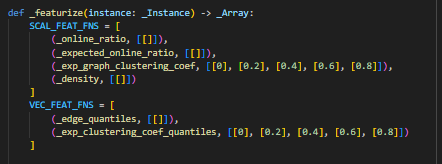

In [ ]:
tc._featurize((matrix, np.random.uniform(0.5, 1, 48)))

In [ ]:
geom_config = {
    'graph_type': 'GEOM',
    'threshold': 0.2,
    'scaling': 1 / np.sqrt(2)
}
instances = ig.sample_instances(48, 16, 1, rng, **geom_config)
tc._featurize(instances[0])

In [ ]:
graph = nx.Graph(G)
pos = nx.spring_layout(graph)  # You can choose different layout algorithms
nx.draw(graph, pos, with_labels=True, font_weight='bold', node_color='skyblue', edge_color='gray', alpha=0.7)
plt.show()

In [ ]:
seed = np.random.randint(0, 500000)
rng = np.random.default_rng(seed)# get the nearest network nodes to two lat/lng points with the distance module

orig = ox.distance.nearest_nodes(G, X=-122.245846, Y=37.828903)
dest = ox.distance.nearest_nodes(G, X=-122.215006, Y=37.812303)
orig = rng.choice(G.nodes, 2)
dest = rng.choice(G.nodes, 2)
# orig = 703006798
# dest = 53126347
print(orig, dest)



In [ ]:
# find the shortest path between nodes, minimizing travel time, then plot it
routes = ox.shortest_path(G, 6982135025, 256021767, weight="travel_time")
print(routes)
# time = nx.shortest_path_length(G, orig, dest, weight="travel_time")
rc = ['r', 'y', 'c']
rc = ['g', 'y', 'r', 'c']
rc = ['c']
# fig, ax = ox.plot_graph_route(G, routes, route_color='c', node_size=0)
def col(r):
	if r == 6982135025:
		return 'r'
	elif r in dest:
		return 'b'
	else:
		return 'grey'
nc = [col(node) for node in G.nodes]
fig, ax = ox.plot_graph(G, node_color=nc, node_size = 50)
fig.savefig("data/founex_nodes.png")
# fig, ax = ox.plot_graph_routes(G, routes, node_size=0, route_colors=rc)

In [ ]:
G.nodes

In [ ]:
for a, b in zip(orig, dest):
	routes = nx.shortest_path_length(G, a, b, weight="travel_time")
	print(routes)

In [ ]:
for a, b in zip(orig, dest):
	routes = nx.shortest_path_length(G, a, weight="travel_time")
	print(routes[b])

In [ ]:
# rc = ['r', 'y', 'c'] * 2
rc = ['r', 'y', 'c', 'g'] * 4
print(len(routes))
fig, ax = ox.plot_graph_routes(G, routes, node_size=0, route_colors=rc)
fig.savefig("data/sf_routes.png")

In [ ]:
matrix

In [ ]:
mat = np.array